In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
%matplotlib inline

In [75]:
df =pd.read_csv('Titanic.csv')

In [76]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [77]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Survived, dtype: int64

In [78]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

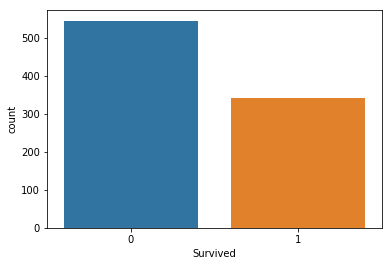

In [79]:
sns.countplot('Survived', data=df)
plt.show()

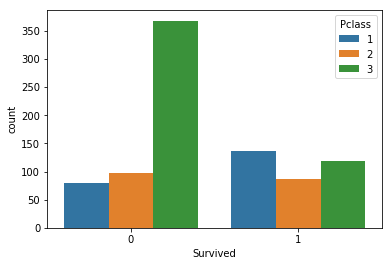

In [80]:
sns.countplot('Survived', hue ='Pclass',data=df)
plt.show()

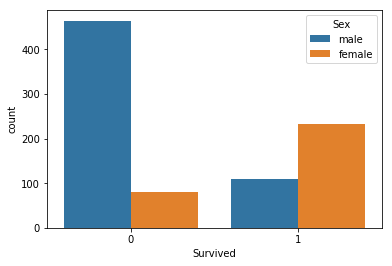

In [81]:
sns.countplot('Survived', hue ='Sex', data =df)
plt.show()

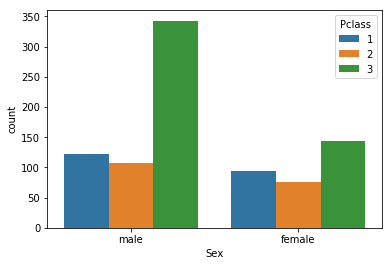

In [82]:
sns.countplot('Sex', hue ='Pclass', data =df)
plt.show()

In [83]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

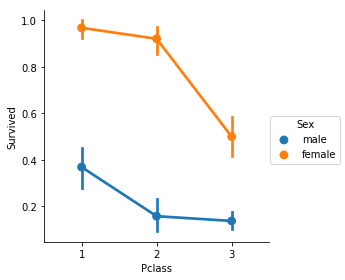

In [84]:
sns.factorplot('Pclass','Survived', hue = 'Sex', data=df)
plt.show()

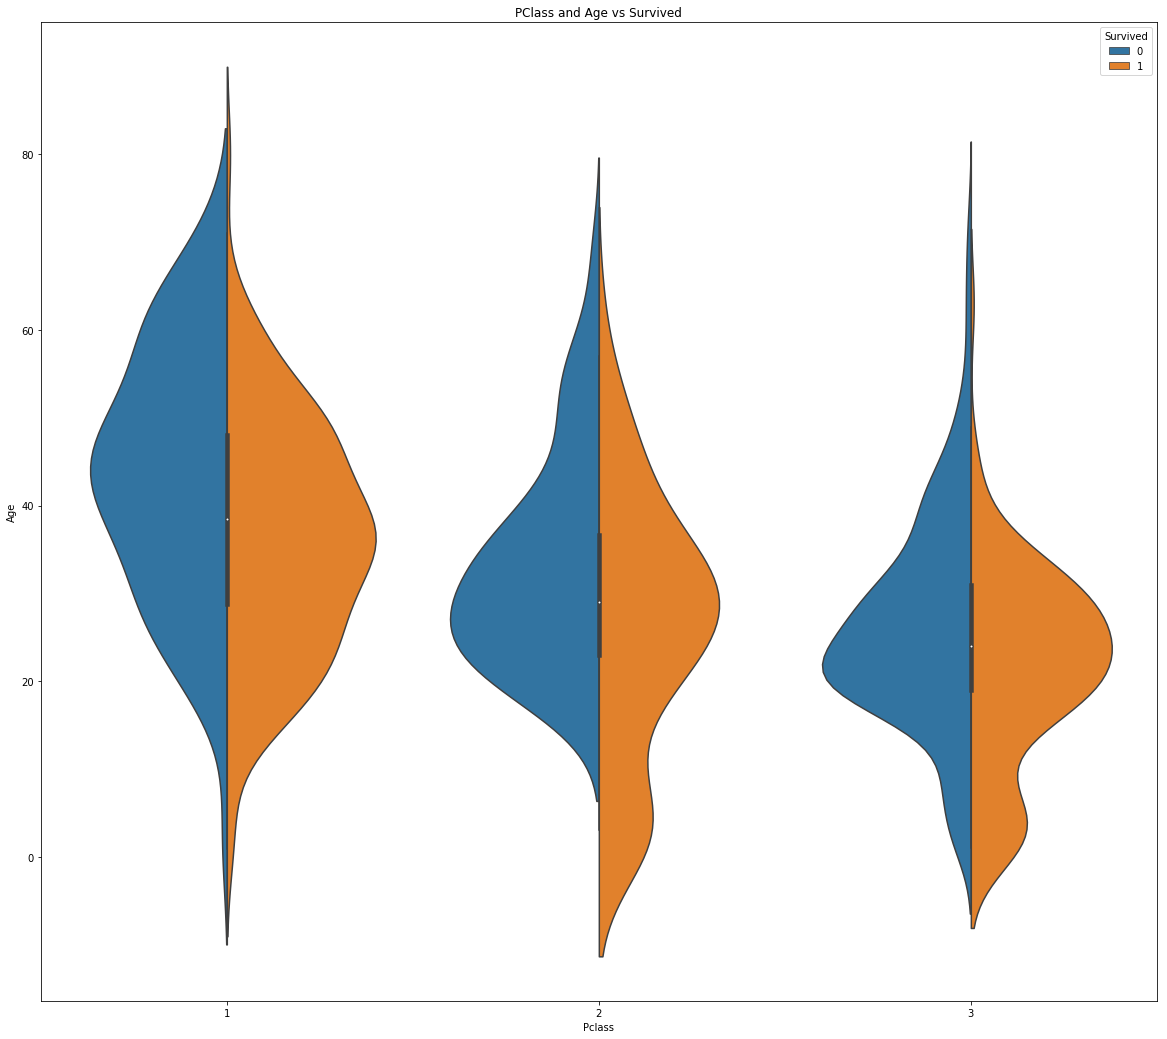

In [85]:
plt.figure(figsize =(20,18))
sns.violinplot('Pclass', 'Age', hue ='Survived', data =df, split = True)
plt.title('PClass and Age vs Survived')
plt.show()

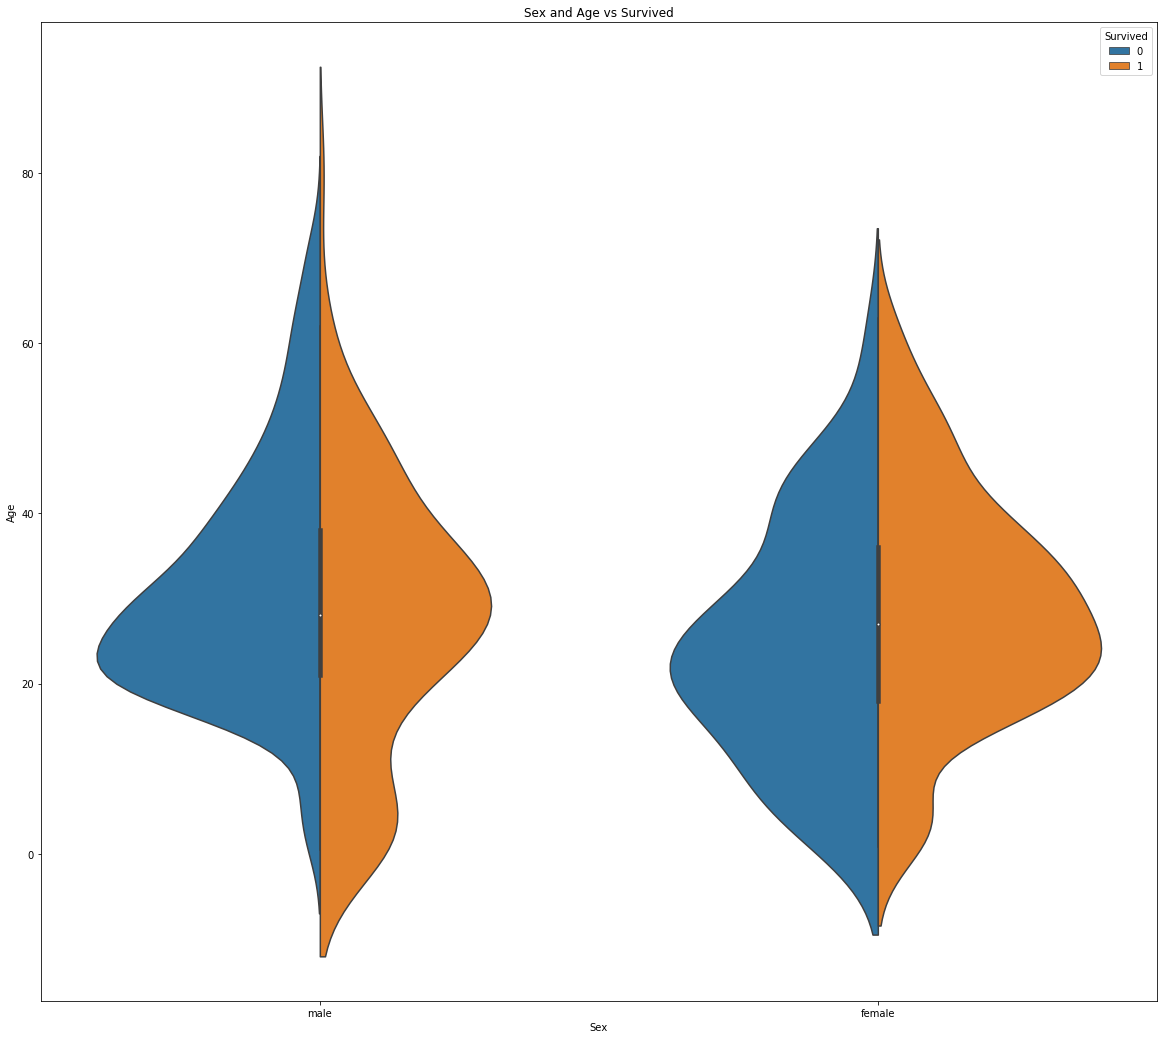

In [86]:
plt.figure(figsize=(20,18))
sns.violinplot('Sex','Age', hue = 'Survived', data = df, split = True)
plt.title('Sex and Age vs Survived')
plt.show()

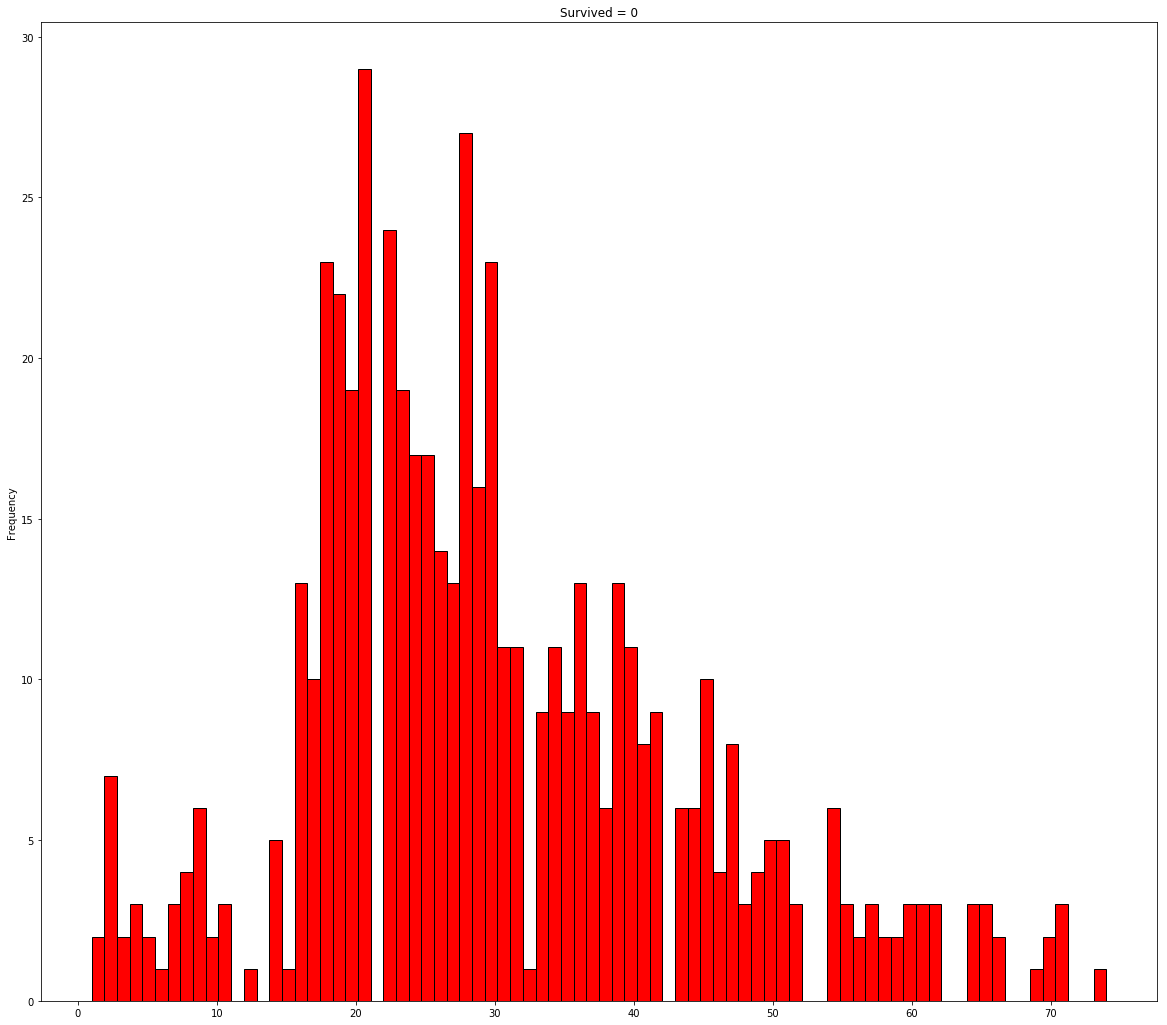

In [87]:
plt.figure(figsize =(20,18))
df[df['Survived'] ==0].Age.plot.hist(bins=80,edgecolor='black',color='red')
plt.title('Survived = 0')
plt.show()

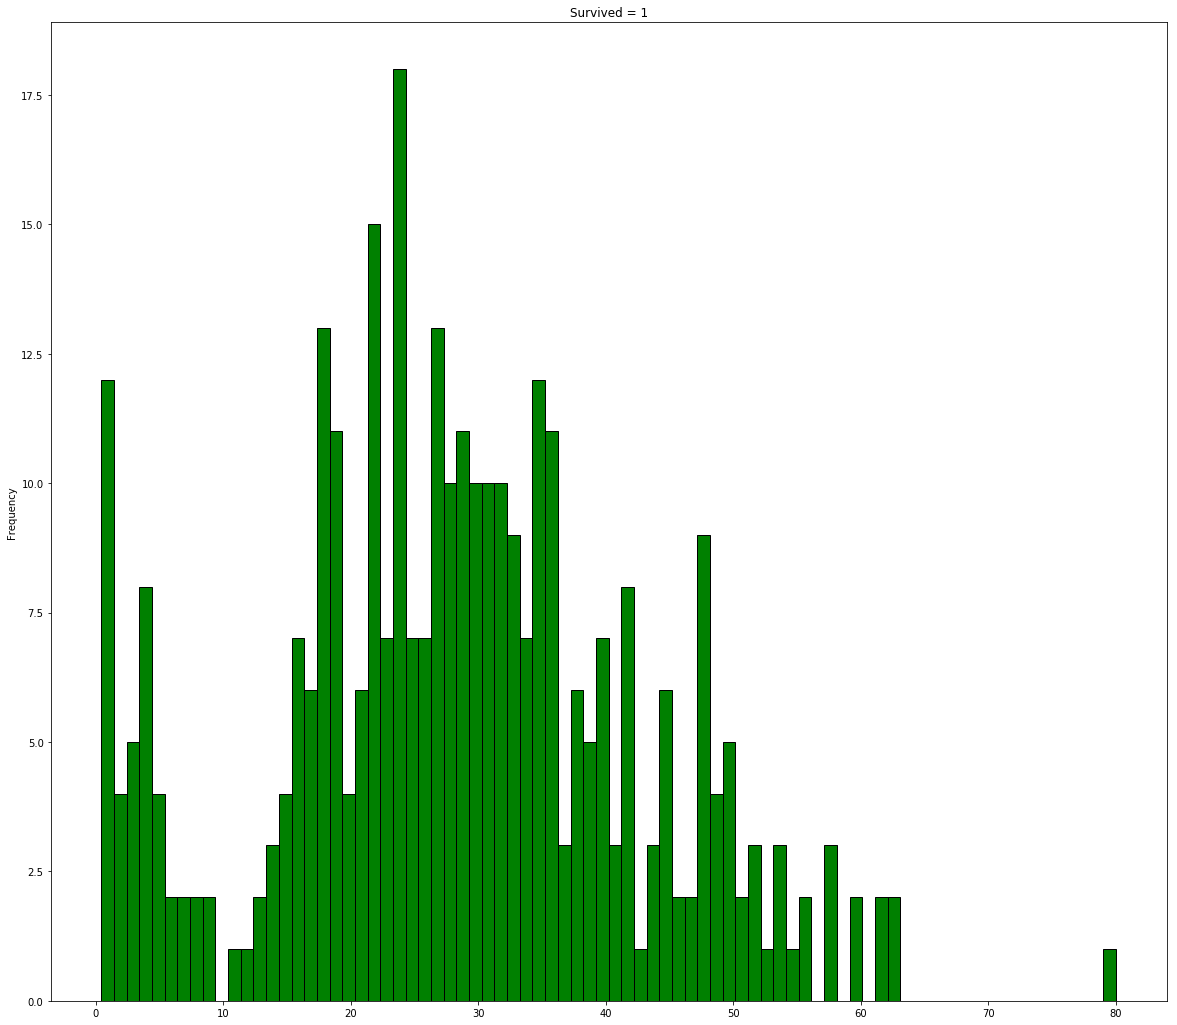

In [88]:
plt.figure(figsize =(20,18))
df[df['Survived'] ==1].Age.plot.hist(bins=80,edgecolor='black',color='green')
plt.title('Survived = 1')
plt.show()

In [98]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

C:\Users\btulu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,513,0,0,6,1


In [103]:
df['Initial'].replace(['Mlle'.'Mme','Ms','Dr','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


SyntaxError: invalid syntax (<ipython-input-103-b7b320b7c7df>, line 1)

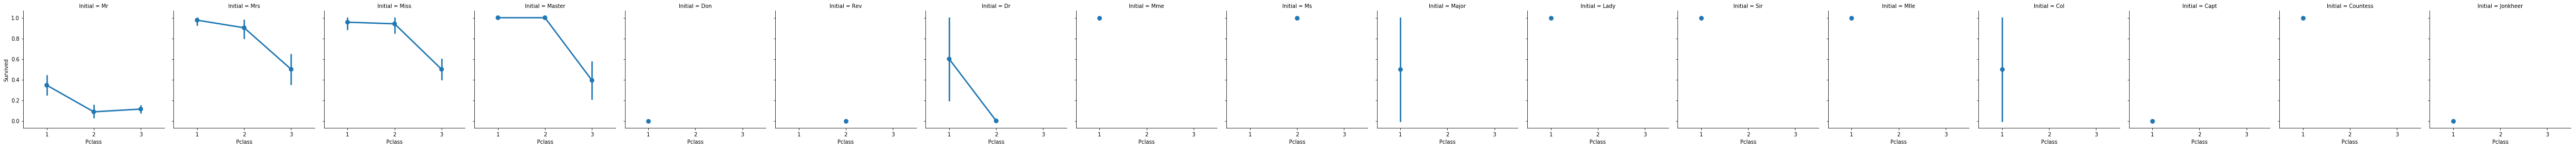

In [100]:
sns.factorplot('Pclass','Survived',col='Initial',data=df)
plt.show()